<a href="https://colab.research.google.com/github/diegosfc91/Advanced-Machine-Learning/blob/main/Copy_of_MLP_con_Early_Stopping_y_Dropout_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Carga de datos:

Valores nulos en el dataset:
 Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64


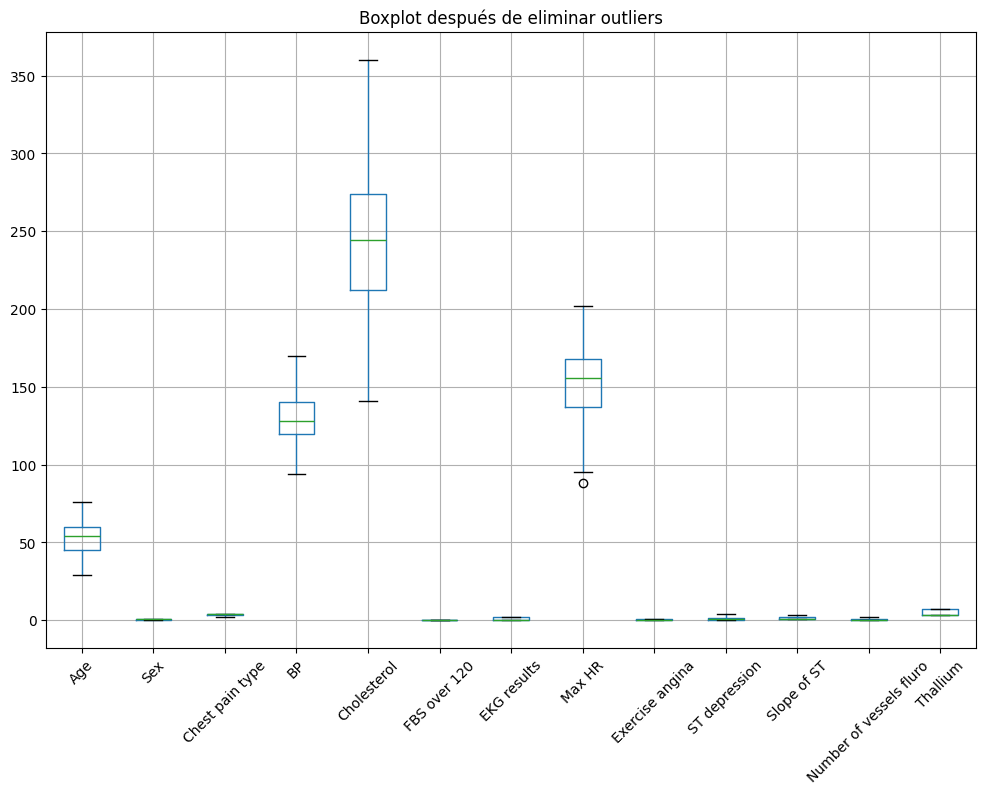

Estadísticas descriptivas de los datos normalizados:
               Age         Sex  Chest pain type          BP  Cholesterol  \
count  192.000000  192.000000       192.000000  192.000000   192.000000   
mean     0.514406    0.666667         0.669271    0.444490     0.480213   
std      0.194857    0.472637         0.384576    0.200254     0.200676   
min      0.000000    0.000000         0.000000    0.000000     0.000000   
25%      0.340426    0.000000         0.500000    0.335526     0.324201   
50%      0.531915    1.000000         1.000000    0.447368     0.472603   
75%      0.659574    1.000000         1.000000    0.605263     0.607306   
max      1.000000    1.000000         1.000000    1.000000     1.000000   

       FBS over 120  EKG results      Max HR  Exercise angina  ST depression  \
count         192.0   192.000000  192.000000       192.000000     192.000000   
mean            0.0     0.476562    0.548702         0.317708       0.257668   
std             0.0     0.4994

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Cargar el dataset
file_path = '/content/Heart_Disease_Prediction.csv'
heart_disease_data = pd.read_csv(file_path)

# Verificar valores nulos
missing_values = heart_disease_data.isnull().sum()
print("Valores nulos en el dataset:\n", missing_values)

# Eliminar outliers utilizando el método del rango intercuartil (IQR)
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Seleccionar columnas numéricas
numeric_cols = heart_disease_data.select_dtypes(include=['int64', 'float64']).columns

# Aplicar eliminación de outliers
heart_disease_data_cleaned = remove_outliers_iqr(heart_disease_data, numeric_cols)

# Graficar boxplots después de eliminar outliers
plt.figure(figsize=(12, 8))
heart_disease_data_cleaned[numeric_cols].boxplot(rot=45)
plt.title("Boxplot después de eliminar outliers")
plt.show()

# Normalización de variables numéricas
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(heart_disease_data_cleaned[numeric_cols])
normalized_df = pd.DataFrame(normalized_data, columns=numeric_cols)

# Mostrar estadísticas descriptivas después de la normalización
print("Estadísticas descriptivas de los datos normalizados:\n", normalized_df.describe())



# 2. Exploración y preprocesamiento de datos:

In [3]:
from sklearn.model_selection import train_test_split

# Verificar el balance de la variable objetivo antes de dividir
target_distribution = heart_disease_data_cleaned['Heart Disease'].value_counts(normalize=True)
print("Distribución de la variable objetivo (Heart Disease):\n", target_distribution)

# Dividir los datos en características (X) y objetivo (y)
X = heart_disease_data_cleaned.drop('Heart Disease', axis=1)
y = heart_disease_data_cleaned['Heart Disease']

# Dividir el dataset en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y)

# Verificar balance en los conjuntos de entrenamiento y prueba
train_distribution = y_train.value_counts(normalize=True)
test_distribution = y_test.value_counts(normalize=True)

print("\nDistribución de la variable objetivo en el conjunto de entrenamiento:\n", train_distribution)
print("\nDistribución de la variable objetivo en el conjunto de prueba:\n", test_distribution)

# Resultados finales
print("\nTamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Distribución de la variable objetivo (Heart Disease):
 Heart Disease
Absence     0.583333
Presence    0.416667
Name: proportion, dtype: float64

Distribución de la variable objetivo en el conjunto de entrenamiento:
 Heart Disease
Absence     0.581699
Presence    0.418301
Name: proportion, dtype: float64

Distribución de la variable objetivo en el conjunto de prueba:
 Heart Disease
Absence     0.589744
Presence    0.410256
Name: proportion, dtype: float64

Tamaño del conjunto de entrenamiento: (153, 13)
Tamaño del conjunto de prueba: (39, 13)


# 3. Reducción de dimensionalidad:

Varianza explicada por cada componente principal: [0.70050873 0.19245341 0.08135724]
Varianza explicada acumulada: [0.70050873 0.89296213 0.97431938]


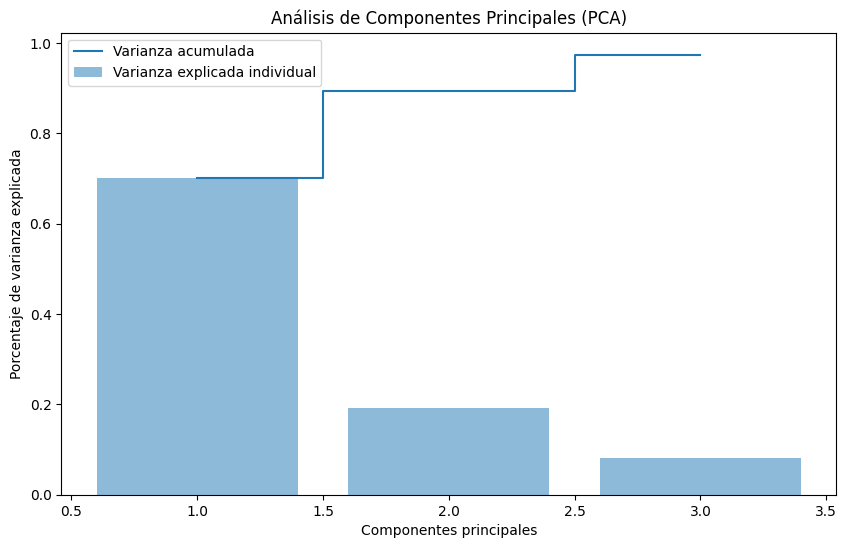

Número de componentes seleccionados para mantener al menos el 90% de la variabilidad: 3

Estadísticas descriptivas de las características reducidas (entrenamiento):
                PC1           PC2           PC3
count  1.530000e+02  1.530000e+02  1.530000e+02
mean  -5.201359e-15  3.399459e-14  2.944340e-14
std    4.478561e+01  2.347440e+01  1.526264e+01
min   -1.082805e+02 -6.253124e+01 -3.023147e+01
25%   -3.424864e+01 -1.697484e+01 -1.126746e+01
50%   -5.868745e-01  6.415387e+00 -2.371288e+00
75%    2.813262e+01  1.759774e+01  1.072774e+01
max    1.141266e+02  5.445264e+01  3.712499e+01


In [4]:
from sklearn.decomposition import PCA
import numpy as np

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=0.9)  # Mantener al menos el 90% de la variabilidad
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Variabilidad explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Mostrar la variabilidad explicada acumulada
cumulative_variance = np.cumsum(explained_variance)
print("Varianza explicada por cada componente principal:", explained_variance)
print("Varianza explicada acumulada:", cumulative_variance)

# Visualizar los componentes principales
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Varianza acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Análisis de Componentes Principales (PCA)')
plt.legend(loc='best')
plt.show()

# Imprimir el número de componentes seleccionados
print("Número de componentes seleccionados para mantener al menos el 90% de la variabilidad:", pca.n_components_)

# Crear un nuevo DataFrame con las características reducidas
columns_pca = [f"PC{i+1}" for i in range(pca.n_components_)]
X_train_reduced = pd.DataFrame(X_train_pca, columns=columns_pca)
X_test_reduced = pd.DataFrame(X_test_pca, columns=columns_pca)

# Mostrar estadísticas descriptivas de los datos reducidos
print("\nEstadísticas descriptivas de las características reducidas (entrenamiento):")
print(X_train_reduced.describe())


# 4. Benchmarking de modelos:

Varianza explicada por cada componente principal: [0.70050873 0.19245341 0.08135724]
Varianza explicada acumulada: [0.70050873 0.89296213 0.97431938]


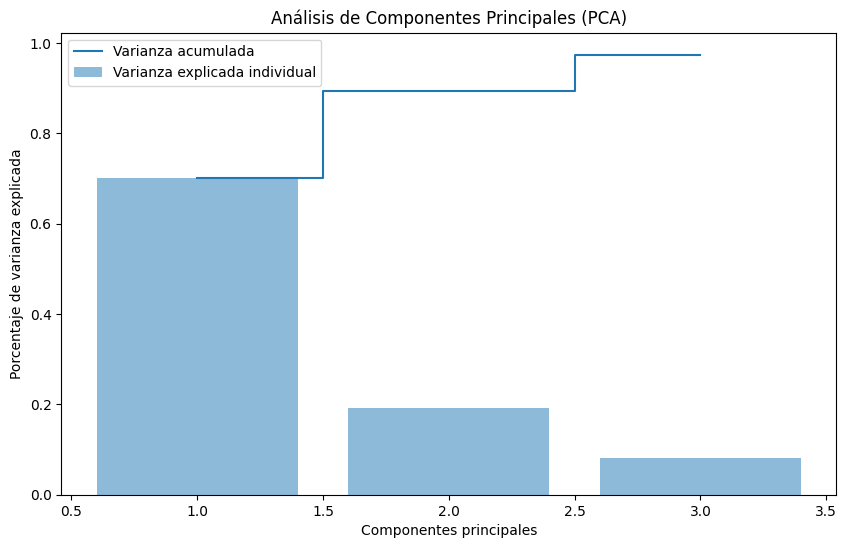

Número de componentes seleccionados para mantener al menos el 90% de la variabilidad: 3

Estadísticas descriptivas de las características reducidas (entrenamiento):
                PC1           PC2           PC3
count  1.530000e+02  1.530000e+02  1.530000e+02
mean  -5.201359e-15  3.399459e-14  2.944340e-14
std    4.478561e+01  2.347440e+01  1.526264e+01
min   -1.082805e+02 -6.253124e+01 -3.023147e+01
25%   -3.424864e+01 -1.697484e+01 -1.126746e+01
50%   -5.868745e-01  6.415387e+00 -2.371288e+00
75%    2.813262e+01  1.759774e+01  1.072774e+01
max    1.141266e+02  5.445264e+01  3.712499e+01

Evaluando modelo: Logistic Regression
Precision: 0.7080 (+/- 0.1167)
Recall: 0.5936 (+/- 0.1019)
F1-score: 0.6432 (+/- 0.0970)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3175, in _bind
    raise TypeError(
TypeError: got an unexpected keyword argument 'needs_proba'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_sele

AUC-ROC: nan (+/- nan)

Evaluando modelo: Decision Tree
Precision: 0.4892 (+/- 0.0916)
Recall: 0.4679 (+/- 0.0625)
F1-score: 0.4742 (+/- 0.0626)
AUC-ROC: nan (+/- nan)

Evaluando modelo: Random Forest
Precision: 0.5075 (+/- 0.1839)
Recall: 0.4231 (+/- 0.0973)
F1-score: 0.4559 (+/- 0.1245)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3175, in _bind
    raise TypeError(
TypeError: got an unexpected keyword argument 'needs_proba'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_sele

AUC-ROC: nan (+/- nan)

Evaluando modelo: SVM
Precision: 0.5993 (+/- 0.0981)
Recall: 0.4372 (+/- 0.0900)
F1-score: 0.4983 (+/- 0.0691)
AUC-ROC: nan (+/- nan)

Resumen de métricas:
                     Precision    Recall  F1-score  AUC-ROC
Logistic Regression   0.707988  0.593590  0.643240      NaN
Decision Tree         0.489217  0.467949  0.474171      NaN
Random Forest         0.507509  0.423077  0.455922      NaN
SVM                   0.599267  0.437179  0.498315      NaN


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 388, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 194, in wrapper
    params = func_sig.bind(*args, **kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3186, in bind
    return self._bind(args, kwargs)
  File "/usr/lib/python3.10/inspect.py", line 3175, in _bind
    raise TypeError(
TypeError: got an unexpected keyword argument 'needs_proba'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_sele

In [5]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, roc_auc_score, precision_score, recall_score, f1_score


# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=0.9)  # Mantener al menos el 90% de la variabilidad
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Variabilidad explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_

# Mostrar la variabilidad explicada acumulada
cumulative_variance = np.cumsum(explained_variance)
print("Varianza explicada por cada componente principal:", explained_variance)
print("Varianza explicada acumulada:", cumulative_variance)

# Visualizar los componentes principales
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Varianza explicada individual')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', label='Varianza acumulada')
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componentes principales')
plt.title('Análisis de Componentes Principales (PCA)')
plt.legend(loc='best')
plt.show()

# Imprimir el número de componentes seleccionados
print("Número de componentes seleccionados para mantener al menos el 90% de la variabilidad:", pca.n_components_)

# Crear un nuevo DataFrame con las características reducidas
columns_pca = [f"PC{i+1}" for i in range(pca.n_components_)]
X_train_reduced = pd.DataFrame(X_train_pca, columns=columns_pca)
X_test_reduced = pd.DataFrame(X_test_pca, columns=columns_pca)

# Mostrar estadísticas descriptivas de los datos reducidos
print("\nEstadísticas descriptivas de las características reducidas (entrenamiento):")
print(X_train_reduced.describe())

# Benchmarking de modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=43),
    'Decision Tree': DecisionTreeClassifier(random_state=43),
    'Random Forest': RandomForestClassifier(random_state=43),
    'SVM': SVC(probability=True, random_state=43)
}

# Métricas a evaluar
scorers = {
    'Precision': make_scorer(precision_score, pos_label='Presence'),
    'Recall': make_scorer(recall_score, pos_label='Presence'),
    'F1-score': make_scorer(f1_score, pos_label='Presence'),
    'AUC-ROC': make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr')
}

results = {}
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=43)

for model_name, model in models.items():
    print(f"\nEvaluando modelo: {model_name}")
    model_results = {}
    for metric_name, scorer in scorers.items():
        scores = cross_val_score(model, X_train_reduced, y_train, cv=stratified_kfold, scoring=scorer)
        model_results[metric_name] = np.mean(scores)
        print(f"{metric_name}: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")
    results[model_name] = model_results

# Mostrar resultados finales
results_df = pd.DataFrame(results).T
print("\nResumen de métricas:")
print(results_df)
